In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

In [3]:
NUM_CLASSES = 4

In [4]:
TIME_STEPS = 16
DIMENSION = 2

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [10]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
16/32 [==============>...............] - ETA: 0s - loss: 1.3982 - accuracy: 0.3677 
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 2s 17ms/step - loss: 1.3893 - accuracy: 0.3784 - val_loss: 1.3619 - val_accuracy: 0.4373
Epoch 2/1000
16/32 [==============>...............] - ETA: 0s - loss: 1.3600 - accuracy: 0.4048
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 7ms/step - loss: 1.3519 - accuracy: 0.4202 - val_loss: 1.3300 - val_accuracy: 0.4637
Epoch 3/1000
18/32 [===============>..............] - ETA: 0s - loss: 1.3269 - accuracy: 0.4392
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 7ms/step - loss: 1.3234 - accuracy: 0.4401 - val_loss: 1.2972 - val_accuracy: 0.4932
Epoch 4/1000
16/32 [==============>...............] - ETA: 0s - l

18/32 [===============>..............] - ETA: 0s - loss: 0.6640 - accuracy: 0.7457
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.6642 - accuracy: 0.7404 - val_loss: 0.4978 - val_accuracy: 0.9282
Epoch 28/1000
19/32 [================>.............] - ETA: 0s - loss: 0.6748 - accuracy: 0.7344
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.6749 - accuracy: 0.7326 - val_loss: 0.4879 - val_accuracy: 0.9328
Epoch 29/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.6646 - accuracy: 0.7409
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.6666 - accuracy: 0.7432 - val_loss: 0.4714 - val_accuracy: 0.9313
Epoch 30/1000
19/32 [================>.............] - ETA: 0s - loss: 0.67

18/32 [===============>..............] - ETA: 0s - loss: 0.5548 - accuracy: 0.7808
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.5504 - accuracy: 0.7873 - val_loss: 0.3090 - val_accuracy: 0.9524
Epoch 54/1000
20/32 [=================>............] - ETA: 0s - loss: 0.5435 - accuracy: 0.7895
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.7986 - val_loss: 0.3050 - val_accuracy: 0.9554
Epoch 55/1000
19/32 [================>.............] - ETA: 0s - loss: 0.5187 - accuracy: 0.8039
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.5255 - accuracy: 0.8019 - val_loss: 0.2995 - val_accuracy: 0.9554
Epoch 56/1000
19/32 [================>.............] - ETA: 0s - loss: 0.52

21/32 [==================>...........] - ETA: 0s - loss: 0.4732 - accuracy: 0.8337
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4815 - accuracy: 0.8273 - val_loss: 0.2457 - val_accuracy: 0.9562
Epoch 80/1000
19/32 [================>.............] - ETA: 0s - loss: 0.4684 - accuracy: 0.8178
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 7ms/step - loss: 0.4844 - accuracy: 0.8122 - val_loss: 0.2440 - val_accuracy: 0.9562
Epoch 81/1000
19/32 [================>.............] - ETA: 0s - loss: 0.4592 - accuracy: 0.8306
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4857 - accuracy: 0.8197 - val_loss: 0.2430 - val_accuracy: 0.9630
Epoch 82/1000
20/32 [=================>............] - ETA: 0s - loss: 0.48

18/32 [===============>..............] - ETA: 0s - loss: 0.4750 - accuracy: 0.8186
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4682 - accuracy: 0.8240 - val_loss: 0.2188 - val_accuracy: 0.9630
Epoch 106/1000
16/32 [==============>...............] - ETA: 0s - loss: 0.4512 - accuracy: 0.8330
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4550 - accuracy: 0.8323 - val_loss: 0.2162 - val_accuracy: 0.9622
Epoch 107/1000
20/32 [=================>............] - ETA: 0s - loss: 0.4659 - accuracy: 0.8191
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4644 - accuracy: 0.8210 - val_loss: 0.2155 - val_accuracy: 0.9630
Epoch 108/1000
21/32 [==================>...........] - ETA: 0s - loss

20/32 [=================>............] - ETA: 0s - loss: 0.4431 - accuracy: 0.8387
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4424 - accuracy: 0.8374 - val_loss: 0.2037 - val_accuracy: 0.9660
Epoch 132/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.4439 - accuracy: 0.8381
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4434 - accuracy: 0.8343 - val_loss: 0.2027 - val_accuracy: 0.9675
Epoch 133/1000
19/32 [================>.............] - ETA: 0s - loss: 0.4305 - accuracy: 0.8335
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4405 - accuracy: 0.8306 - val_loss: 0.2043 - val_accuracy: 0.9630
Epoch 134/1000
19/32 [================>.............] - ETA: 0s - loss

19/32 [================>.............] - ETA: 0s - loss: 0.4412 - accuracy: 0.8298
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4372 - accuracy: 0.8384 - val_loss: 0.1900 - val_accuracy: 0.9683
Epoch 158/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.4190 - accuracy: 0.8459
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4305 - accuracy: 0.8419 - val_loss: 0.1905 - val_accuracy: 0.9683
Epoch 159/1000
19/32 [================>.............] - ETA: 0s - loss: 0.4272 - accuracy: 0.8363
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4395 - accuracy: 0.8333 - val_loss: 0.1904 - val_accuracy: 0.9683
Epoch 160/1000
20/32 [=================>............] - ETA: 0s - loss

16/32 [==============>...............] - ETA: 0s - loss: 0.4131 - accuracy: 0.8452
Epoch 183: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4059 - accuracy: 0.8530 - val_loss: 0.1835 - val_accuracy: 0.9690
Epoch 184/1000
19/32 [================>.............] - ETA: 0s - loss: 0.4427 - accuracy: 0.8339
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4423 - accuracy: 0.8346 - val_loss: 0.1845 - val_accuracy: 0.9683
Epoch 185/1000
19/32 [================>.............] - ETA: 0s - loss: 0.4360 - accuracy: 0.8314
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8386 - val_loss: 0.1826 - val_accuracy: 0.9683
Epoch 186/1000
19/32 [================>.............] - ETA: 0s - loss

20/32 [=================>............] - ETA: 0s - loss: 0.4289 - accuracy: 0.8449
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8442 - val_loss: 0.1804 - val_accuracy: 0.9698
Epoch 210/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.4541 - accuracy: 0.8355
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4410 - accuracy: 0.8369 - val_loss: 0.1790 - val_accuracy: 0.9705
Epoch 211/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.4374 - accuracy: 0.8446
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4325 - accuracy: 0.8419 - val_loss: 0.1791 - val_accuracy: 0.9721
Epoch 212/1000
18/32 [===============>..............] - ETA: 0s - loss

20/32 [=================>............] - ETA: 0s - loss: 0.3980 - accuracy: 0.8539
Epoch 235: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4044 - accuracy: 0.8522 - val_loss: 0.1705 - val_accuracy: 0.9713
Epoch 236/1000
20/32 [=================>............] - ETA: 0s - loss: 0.4140 - accuracy: 0.8496
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4199 - accuracy: 0.8459 - val_loss: 0.1700 - val_accuracy: 0.9713
Epoch 237/1000
19/32 [================>.............] - ETA: 0s - loss: 0.3951 - accuracy: 0.8557
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4116 - accuracy: 0.8434 - val_loss: 0.1711 - val_accuracy: 0.9713
Epoch 238/1000
20/32 [=================>............] - ETA: 0s - loss

19/32 [================>.............] - ETA: 0s - loss: 0.3937 - accuracy: 0.8454
Epoch 261: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.3992 - accuracy: 0.8512 - val_loss: 0.1618 - val_accuracy: 0.9721
Epoch 262/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.3901 - accuracy: 0.8533
Epoch 262: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.3970 - accuracy: 0.8507 - val_loss: 0.1607 - val_accuracy: 0.9721
Epoch 263/1000
19/32 [================>.............] - ETA: 0s - loss: 0.3932 - accuracy: 0.8569
Epoch 263: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.3931 - accuracy: 0.8545 - val_loss: 0.1611 - val_accuracy: 0.9721
Epoch 264/1000
18/32 [===============>..............] - ETA: 0s - loss

22/32 [===================>..........] - ETA: 0s - loss: 0.3964 - accuracy: 0.8509
Epoch 287: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4014 - accuracy: 0.8505 - val_loss: 0.1594 - val_accuracy: 0.9713
Epoch 288/1000
19/32 [================>.............] - ETA: 0s - loss: 0.3992 - accuracy: 0.8516
Epoch 288: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.3936 - accuracy: 0.8520 - val_loss: 0.1583 - val_accuracy: 0.9721
Epoch 289/1000
19/32 [================>.............] - ETA: 0s - loss: 0.4011 - accuracy: 0.8516
Epoch 289: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.3939 - accuracy: 0.8537 - val_loss: 0.1585 - val_accuracy: 0.9705
Epoch 290/1000
18/32 [===============>..............] - ETA: 0s - loss

20/32 [=================>............] - ETA: 0s - loss: 0.4114 - accuracy: 0.8594
Epoch 313: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4077 - accuracy: 0.8555 - val_loss: 0.1595 - val_accuracy: 0.9713
Epoch 314/1000
19/32 [================>.............] - ETA: 0s - loss: 0.3943 - accuracy: 0.8610
Epoch 314: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.3846 - accuracy: 0.8610 - val_loss: 0.1592 - val_accuracy: 0.9713
Epoch 315/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.4110 - accuracy: 0.8451
Epoch 315: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4150 - accuracy: 0.8452 - val_loss: 0.1604 - val_accuracy: 0.9721
Epoch 316/1000
18/32 [===============>..............] - ETA: 0s - loss

19/32 [================>.............] - ETA: 0s - loss: 0.4053 - accuracy: 0.8528
Epoch 339: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.4007 - accuracy: 0.8522 - val_loss: 0.1548 - val_accuracy: 0.9690
Epoch 340/1000
17/32 [==============>...............] - ETA: 0s - loss: 0.3982 - accuracy: 0.8529
Epoch 340: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 6ms/step - loss: 0.3967 - accuracy: 0.8575 - val_loss: 0.1545 - val_accuracy: 0.9721
Epoch 341/1000
17/32 [==============>...............] - ETA: 0s - loss: 0.4007 - accuracy: 0.8511
Epoch 341: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 7ms/step - loss: 0.4020 - accuracy: 0.8487 - val_loss: 0.1540 - val_accuracy: 0.9721
Epoch 342/1000
17/32 [==============>...............] - ETA: 0s - loss

In [13]:

model = tf.keras.models.load_model(model_save_path)

In [14]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 145ms/step
[0.9413935  0.0156089  0.01269443 0.03030311]
0


42/42 [==============================] - 0s 2ms/step


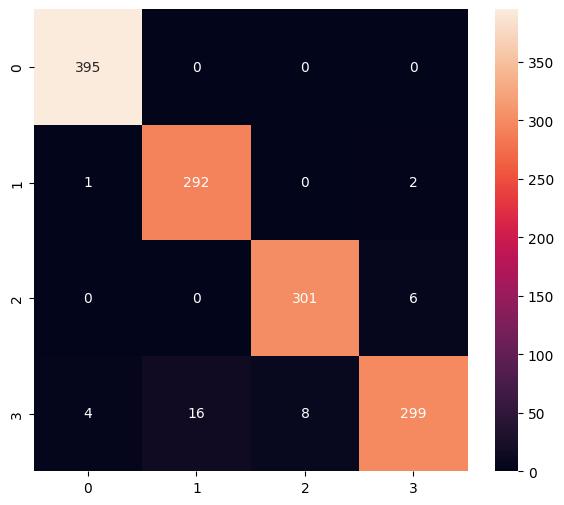

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.95      0.99      0.97       295
           2       0.97      0.98      0.98       307
           3       0.97      0.91      0.94       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:

model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Priyanka\AppData\Local\Temp\tmpu9oc968o\assets


6432

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9413936  0.01560889 0.01269443 0.0303031 ]
0
